0.9233333333333333
[[1030   17]
 [  75   78]]
0.9446733372572101
[[5956   81]
 [ 295  464]]


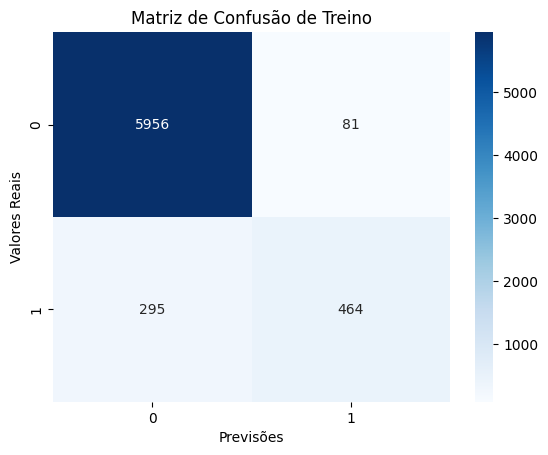

In [1]:
import pandas as pd
import numpy as np
from joblib import dump
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC

df = pd.read_csv('waterQuality.csv')
df = df.replace('#NUM!', np.nan)
df.dropna(inplace=True)

Y = df['is_safe']
X = df.drop('is_safe', axis = 1)

pca = PCA(n_components = 'mle') #decide o melhor número de forma automatizada
pca.fit(X)
X = pca.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15,
random_state=42)

pipeline = Pipeline ([
    ('scaler', StandardScaler()),
    ('classifier', tree.DecisionTreeClassifier(random_state=100)),
    # ('classifier', HistGradientBoostingClassifier(max_iter=100)),
    # ('classifier', SVC()),
    # ('classifier', RandomForestClassifier()),
    # ('classifier', KNeighborsClassifier()),
])

parameters = {
    #Decision Tree
    'classifier__max_depth' : [5, 6, 7, 8],
    'classifier__min_samples_split' : [2, 3, 4],
    'classifier__min_samples_leaf': [5, 6, 7],  
    'classifier__max_features': [None],

    # #Gradient Boosting
    # 'classifier__max_depth' : [16, 17, 18, 19],
    # 'classifier__min_samples_leaf' : list(range(2, 10)),
    # 'classifier__learning_rate' : list(range(1, 5)),

    # #SVC
    # 'classifier__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    # 'classifier__degree' : list(range(2, 5)),

    # #Random Forest
    # 'classifier__max_depth' : [18, 19, 20],
    # 'classifier__min_samples_split' : [9, 10, 11],

    # #KNeighbours
    # 'classifier__n_neighbors': [3, 4, 5, 6],
    # 'classifier__algorithm': ['auto'],
    # 'classifier__leaf_size': [1],
}

model = GridSearchCV(
    pipeline,
    parameters,
    n_jobs = 3
)

# model = GridSearchCV(
#     SVC(),
#     {
#         'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
#         'degree' : list(range(2, 5))
#     },
#     n_jobs = 5
# )

model.fit(X_train, Y_train)
# print(model.best_params_)

# model = model.best_estimator_
# model.fit(X_train, Y_train)
# dump(model, 'model.pkl')


print(accuracy_score(Y_test, model.predict(X_test)))
print(confusion_matrix(Y_test, model.predict(X_test)))
print(accuracy_score(Y_train, model.predict(X_train)))
print(confusion_matrix(Y_train, model.predict(X_train)))

Y_pred = model.predict(X_train)

# Matriz de Confusão
cm = confusion_matrix(Y_train, Y_pred)
violet_palette = sns.light_palette("violet", as_cmap=True)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão de Treino')
plt.show()


In [ ]:
print(model.best_params_)